<p style="text-align: center; font-size: 35px">به نام خدا</p>
<p style="text-align: center; font-size: 25px">هوش مصنوعی</p>
<p style="text-align: center; font-size: 25px">تمرین کامپیوتری شماره 3</p>
<p style="text-align: center; font-size: 25px">علی مهرانی</p>
<p style="text-align: center; font-size: 25px">شماره دانشجویی : 810198542</p>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas
import time
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
import cv2
TESTSPLITRATIO = 0.3

# Phase 1 - Data analysis

In [44]:
pkl_data_file = open('dataset/data.pkl', 'rb')
data = pickle.load(pkl_data_file)
print(len(data))

pkl_label_file = open('dataset/label.pkl', 'rb')
label = pickle.load(pkl_label_file)
print(len(label))

6000
6000


## train-test split

### q1
In this section we use sklearn library to split data to train and test.   
the split ratio is considered 0.3.   
according to many sources a good ratio to split train-test data should be 0.8/0.2 or 0.7/0.3 or values close.      

In [45]:
label_train, label_test, data_train, data_test = train_test_split(label, data, test_size=TESTSPLITRATIO)

### q2

Text(0.5, 0, 'image of digit 0')

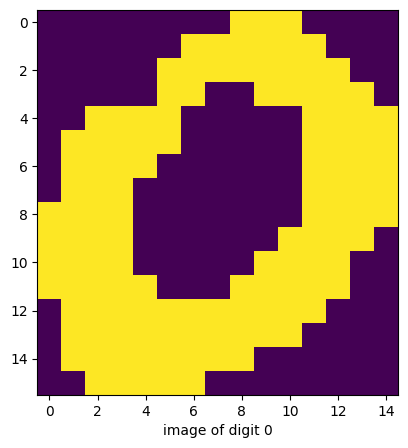

In [46]:
plt.figure(figsize=(10,5))
plt.imshow(data_train[100])
plt.xlabel('image of digit ' + str(label_train[100]))

### q3
In this section we use cv2 package to resize image.  
Then we change all non-0 values to 1 in the newly resized picture.   
The reason we resize pictures is that we can check and compare pixel values with train data directly in naive bayes without having to check image size and scaling.     

In [47]:
data_train_resized = []
data_test_resized = []

for i in data_train :
    row = cv2.resize(i, (20,20))
    #row[row>0]=1 #comment this line to avoid changing non-0 valus to 1
    data_train_resized.append(row)
    
for i in data_test :
    row = cv2.resize(i, (20,20))
    #row[row>0]=1 #comment this line to avoid changing non-0 valus to 1
    data_test_resized.append(row)

print(label_train[105])
print(data_train_resized[105])
print(label_test[100])
print(data_test_resized[100])

1
[[255 255 255 255 255 255 255 255 242 166  89  13   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 251 226 201 176 129  77  26   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 191 115  38   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 248 204 160 116  81  49  16   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 242 166  89  13   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 248 208 168 128  91  55  18   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 191 115  38   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 191 115  38   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 191 115  38   0   0   0
    0   0]
 [  0   0  64 140 217 255 255 255 255 255 255 255 191 115  38   0   0   0
    0   0]
 [  0   0  64 140 217 255 255 255 255 255 255 255 191 115  38   0   0   0
    0   0]
 [  0   0  64 140 217 255 255 255 255 255 255 255 191 115  38  

### q4

0
[[  0   0   0   0   0 134 255 255 255 255 255 255 255 255 255 248 108   0
    0   0]
 [  0   0   0  27  62 164 255 255 255 255 255 255 255 255 255 250 145  56
   21   0]
 [  0   0   0  81 186 225 255 255 255 255 255 255 255 255 255 253 218 167
   62   0]
 [  0   0   0 108 248 255 255 255 255 255 255 255 255 255 255 255 255 231
  126  64]
 [  0   0   0 108 248 255 255 255 255 255 255 255 255 255 255 255 255 247
  212 191]
 [  0  21  56 145 250 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [  0  62 167 218 253 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [  0  83 223 255 255 255 255 255 255 255 237 202 215 250 255 255 255 255
  255 255]
 [  0  83 223 255 255 255 255 255 255 255 202  97 135 241 255 255 255 255
  255 255]
 [  0  83 223 255 255 255 255 255 244 209 156  86 135 241 255 255 255 255
  255 255]
 [  0  83 223 255 255 255 255 255 222 116  99 169 215 250 255 255 255 255
  255 255]
 [ 64 126 231 255 255 255 255 255 222 116 116 222 255 255 255 2

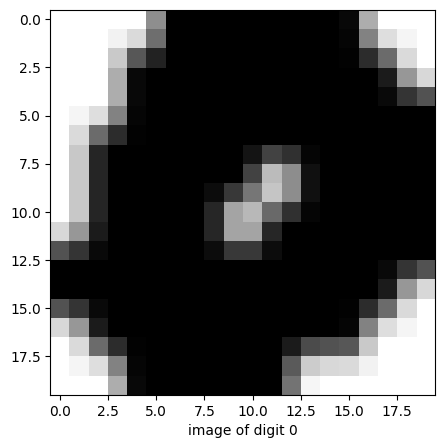

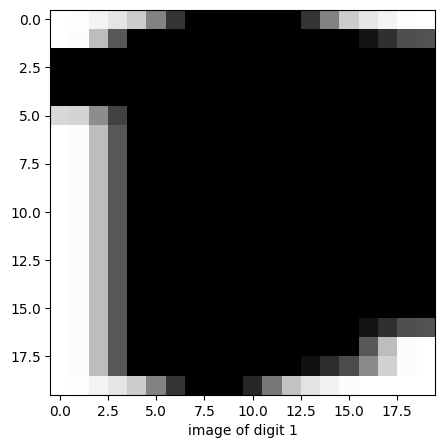

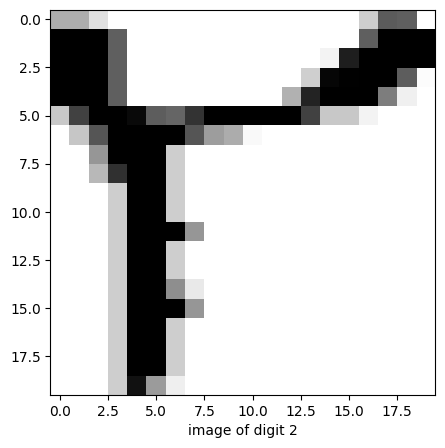

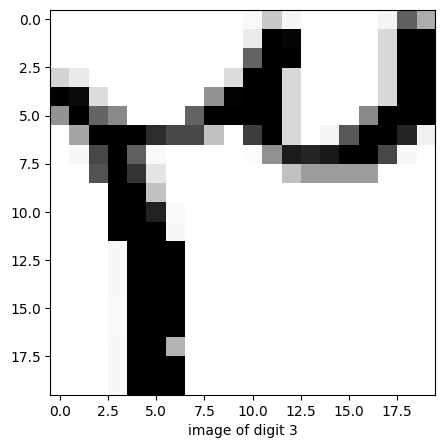

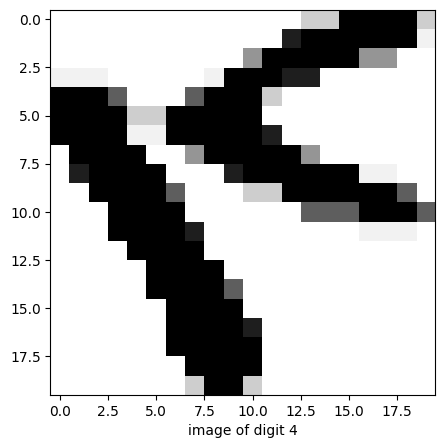

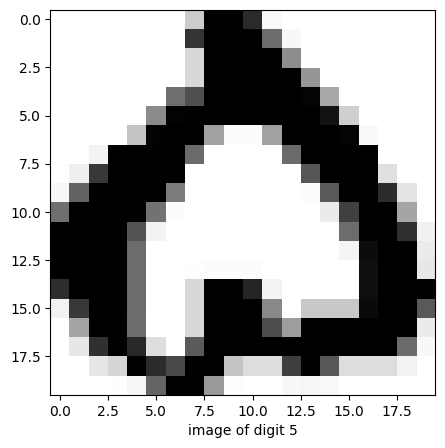

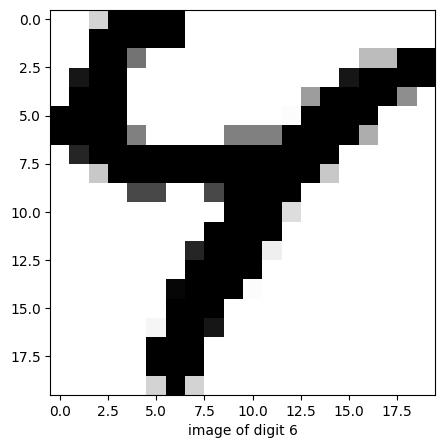

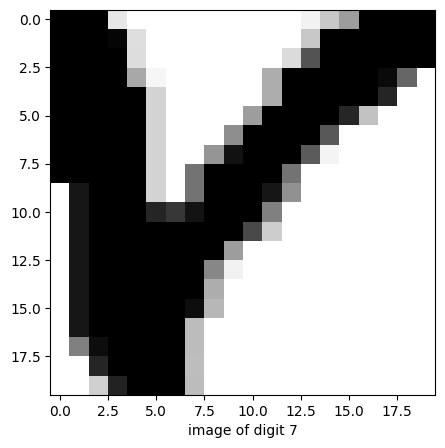

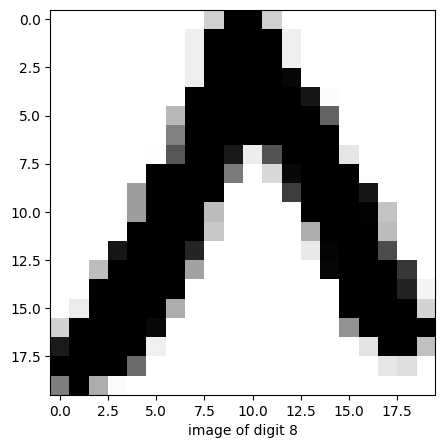

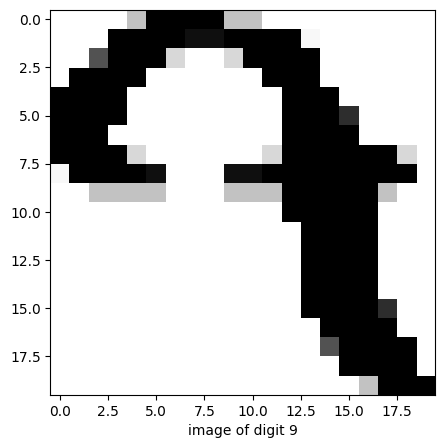

In [48]:
for i in range(0, 10) :
    print(i)
    print(data_train_resized[label_train.index(i)])

for i in range(0,10) :
#     plt.subplot(2,5, i+1)
    plt.figure(figsize=(10,5))
    plt.imshow(data_train_resized[label_train.index(i)], cmap="Greys")
    plt.xlabel('image of digit ' + str(i))
    

### q5

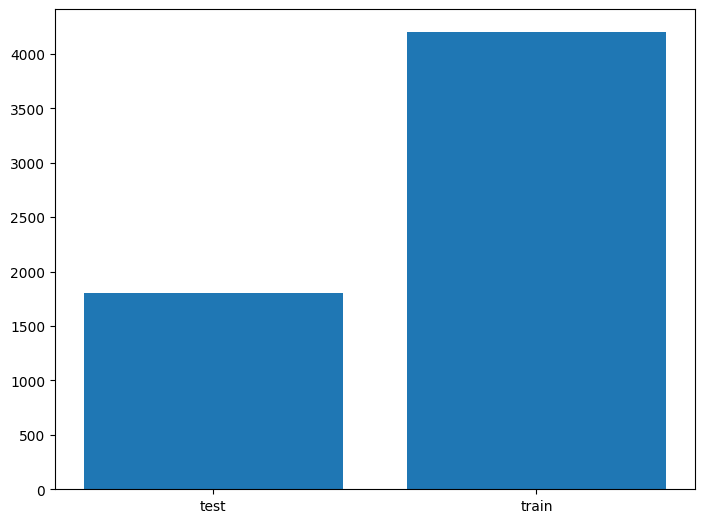

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sections = ['test','train']
data = [len(data_test_resized), len(data_train_resized)]
ax.bar(sections,data)
plt.show()

### q6   
In this section we use sklearn preprocessing methods to scale image values.   
The reason we do this is that ... 

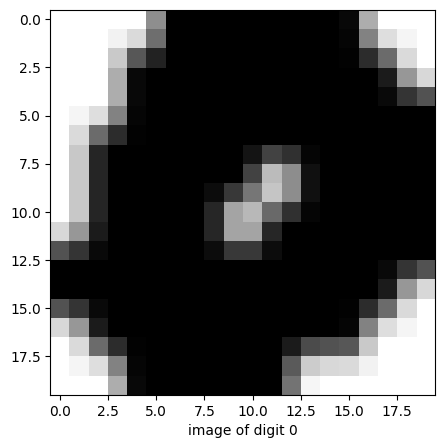

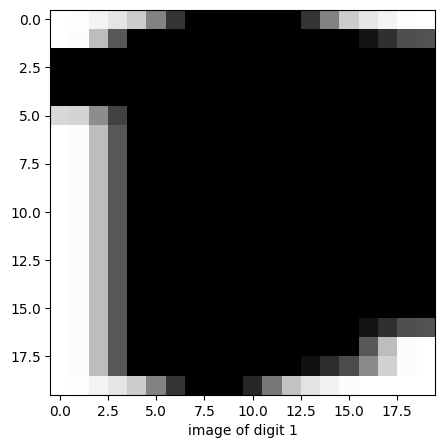

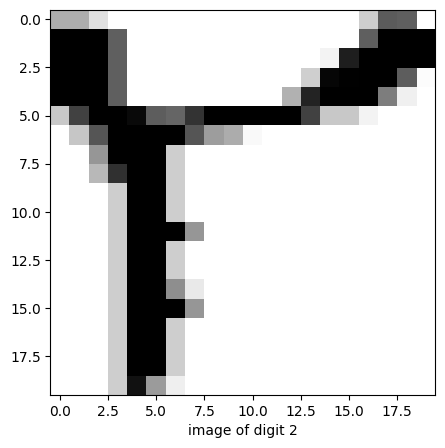

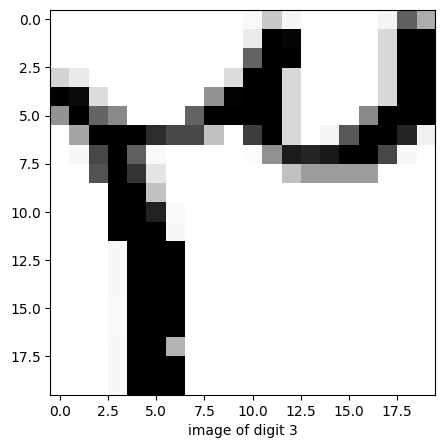

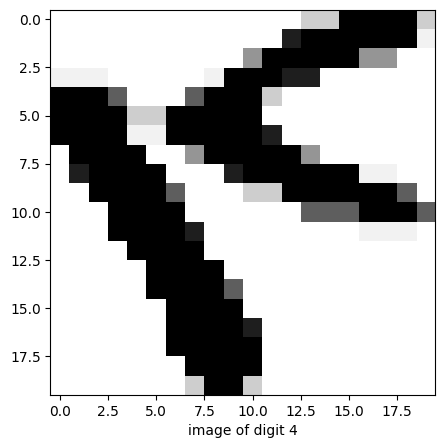

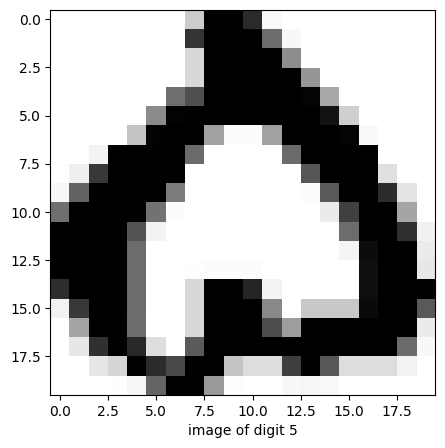

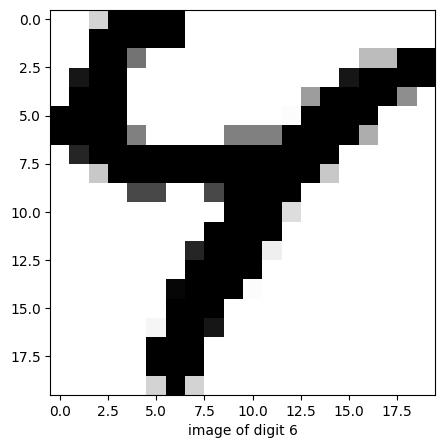

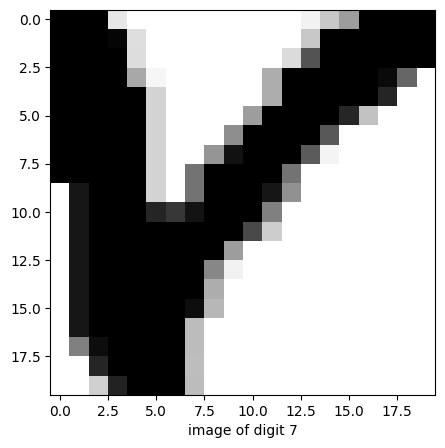

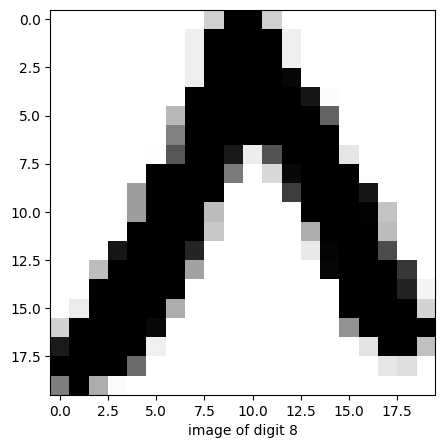

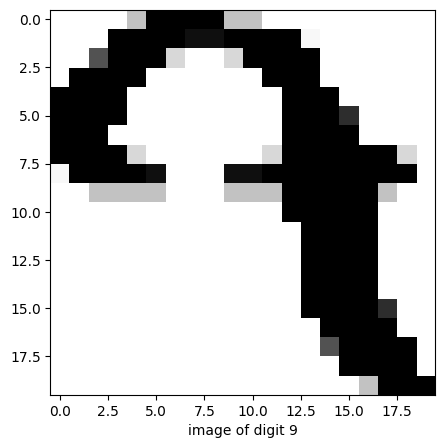

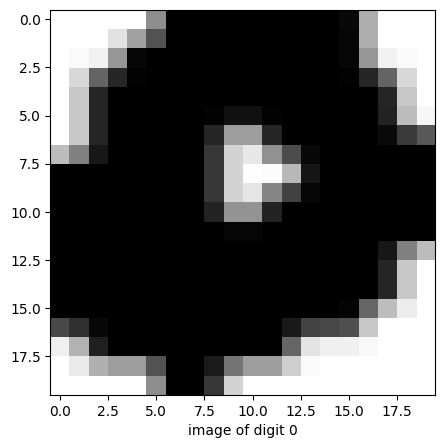

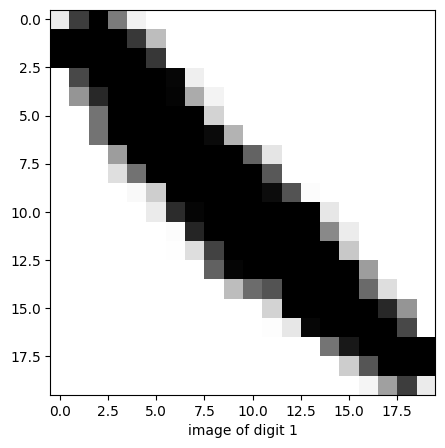

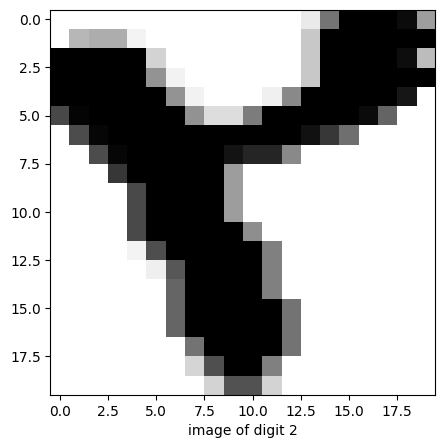

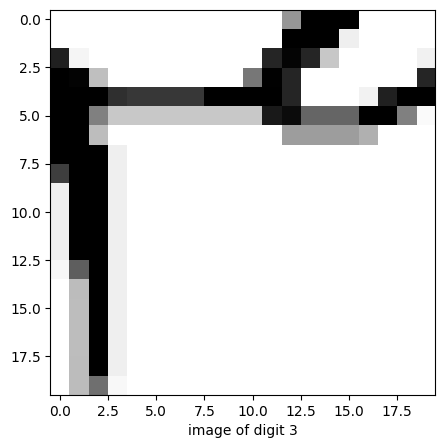

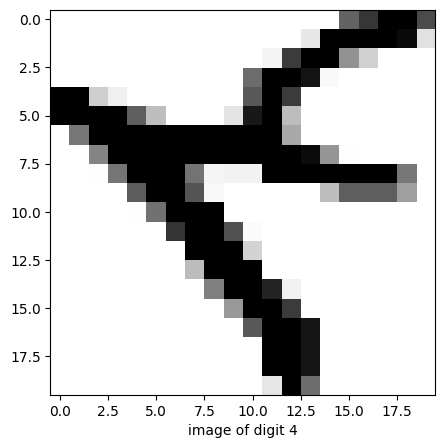

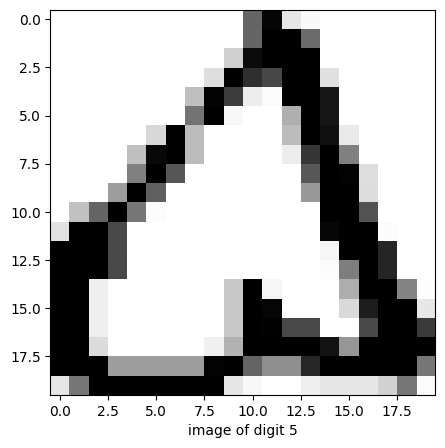

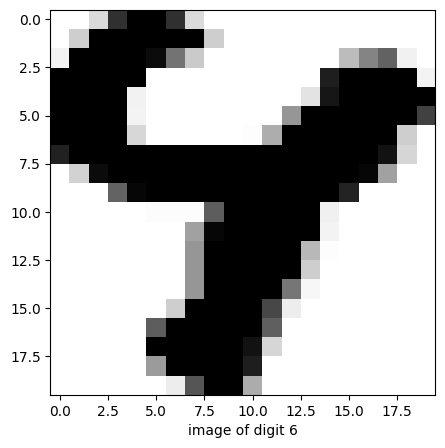

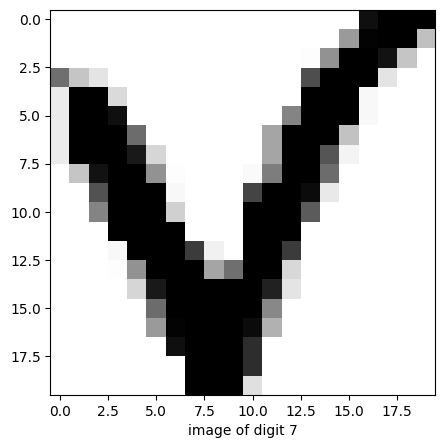

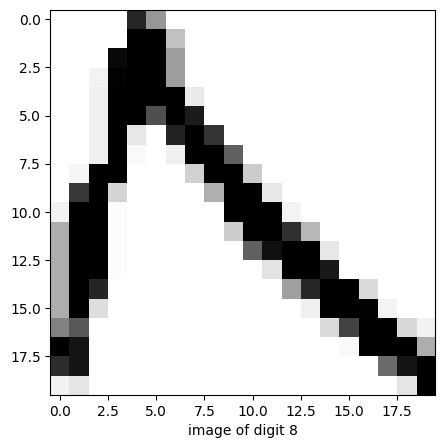

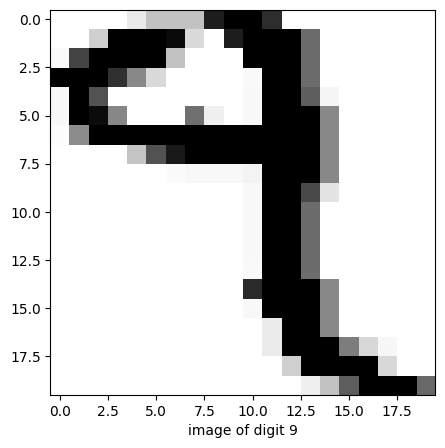

In [60]:
for data_tr in data_train_resized :
    data_tr = pre.MinMaxScaler().fit_transform(data_tr)
for data_ts in data_test_resized :
    data_ts = pre.MinMaxScaler().fit_transform(data_ts)

for i in range(0,10) :
    plt.figure(figsize=(10,5))
    plt.imshow(data_train_resized[label_train.index(i)], cmap="Greys")
    plt.xlabel('image of digit ' + str(i))

for i in range(0,10) :
    plt.figure(figsize=(10,5))
    plt.imshow(data_test_resized[label_test.index(i)], cmap="Greys")
    plt.xlabel('image of digit ' + str(i))
    
    
# print(label_train[100])
# print(data_train_resized[100])
# print(label_test[100])
# print(data_test_resized[100])

# Phase 2 - Problem procedure

### q7   
#### Likelihood:    
It refers to the probability of observing the data that has been observed assuming that the data came from a specific scenario.        
For example you have symptoms of covid and you got positiive in test, likelihood refers to probability of observing the data to
check whether you really have covid or not. (Its calculation of likelihood in 2 scenarios which is that you have covid or not!)   
for example likelihood of observing a positive result in covid test given that you do not really have covid.   
#### prior:   
In the previous example(covid test), prior is the probability of (having) the disease before seeing(checking) any kind of test result.   
#### predictor:   
In the previous example predictor refers to thr probablity of getting (positive) test result.   
#### posterior:   
It refers to the probability of having disease knowing that you have positive test (or other scenarios).   


Another example would be the rain-predict problem in course slides which was :   
p(rain | predict) = p(predict|rain)p(rain)/p(predict)   
likelihood is probability of correct prediction when it rains (0.9 given in problem description).   
prior is general probability of raining.   
predictor is probability of correct prediction in all scenarios (raining or not raining).   
posterior is probability of raining knowing that it has been predicted!   
